In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=b6b237a4ce4c5da026a4662aed45e40b936ebbfc538f8b9c12c0b0707359f2f6
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 19.7 MB/s eta 0:00:00


In [2]:
from typing import List, Optional
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')

#La prueba de Hadamard

La prueba de Hadamard es una primitiva algorítmica cuántica que se utiliza para estimar el valor esperado de un operador unitario $\hat U$ que actúa sobre un estado cuántico $|\psi\rangle$. Es un componente fundamental en muchos algoritmos cuánticos, incluidos la simulación cuántica, la química cuántica y el aprendizaje automático cuántico.

La prueba de Hadamard crea una variable aleatoria cuyo valor esperado es la parte real del valor esperado de $\hat U$, $${\rm Re}\,\langle\psi |\hat U|\psi\rangle.$$ La prueba funciona aplicando una compuerta de Hadamard a un qubit ancilla, condicionada a que el primer qubit se encuentre en un estado de superposición. Esto produce una distribución de probabilidad sobre los resultados de la medición del qubit ancilla, que se puede utilizar para estimar el valor esperado.

En este ejercicio, usaremos $|\psi\rangle=|0\rangle$.

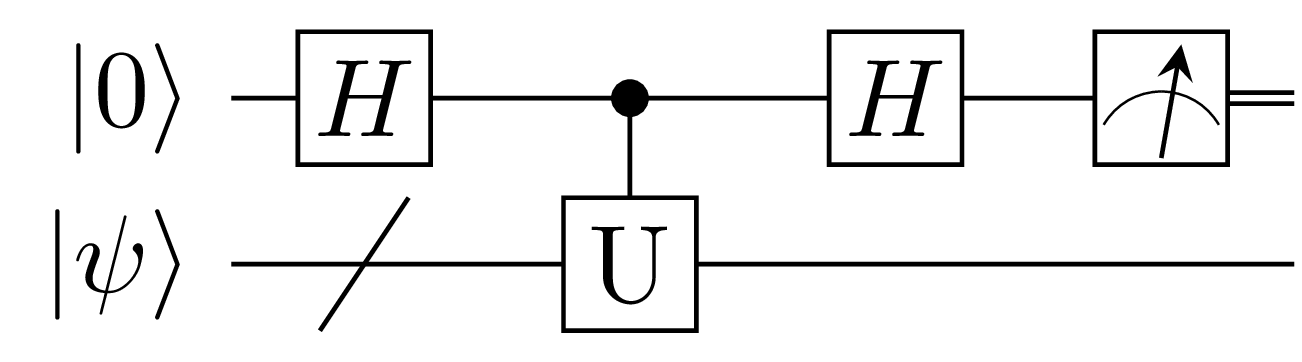

## Ejercicio 1:

Muestre que la probabilidad de medir el primero qubit en el estado $|0\rangle$ es $$\tfrac{1}{2}(1+{\rm Re}\,\langle\psi|\hat U|\psi\rangle)$$

*Hint:* $$\langle\psi|\hat U^\dagger|\psi\rangle=(\langle\psi|\hat U|\psi\rangle)^*$$

In [3]:
def ht_circuit():

    qr = QuantumRegister(2)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)

    qc.h(qr[0])

    # Coloque una compuerta controlada. En este caso, usamos CNOT, pruebe con
    # otras compuertas

    qc.cx(qr[0], qr[1])

    ##########################################################################

    qc.h(qr[0])

    qc.measure(qr[0], cr[0])

    return qc

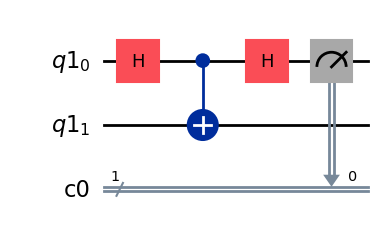

In [4]:
hadamard_test = ht_circuit()
hadamard_test.draw('mpl')

In [5]:
shots = 1024
counts = backend.run(hadamard_test, shots=shots).result().get_counts()

probability_0 = counts.get('0')/shots

print("Probability of measuring the first qubit in |0> = ",probability_0)

Probability of measuring the first qubit in |0> =  0.5126953125


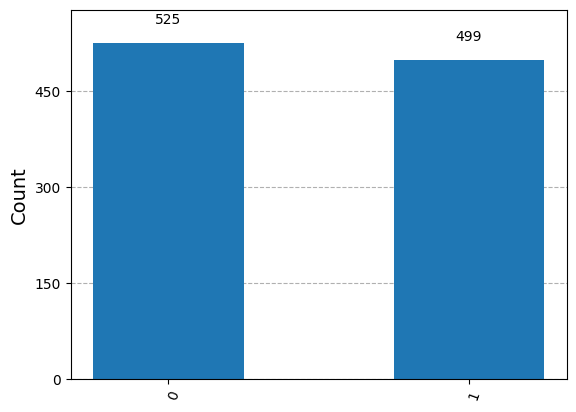

In [6]:
plot_histogram(counts)

## Ejercicio 2:

Usando los resultados anteriores, calcule la parte real del valor esperado del operador $\hat U$ (en el programa original, $\hat U =\hat X$).

In [7]:
def ev(probability_0):

  # Complete la función para obtener el valor esperado de U


  ############################################################

  return expectation_value

print("Re (<U>) = ",ev(probability_0))

Re (<U>) =  0.025390625


## Ejercicio 3:

Explique si sus resultados coinciden con la teoría, para CNOT y para la compuerta CRZGate (https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.CRZGate), con el valor de $\lambda$ de su elección.

## Ejercicio 4:

Diseñe un cicrcuito que le permita medir ${\rm Im}\,\langle\psi|\hat U|\psi\rangle$.

*Hint:* encuentre una compuerta que haga uso del número $i$.
(https://docs.quantum.ibm.com/api/qiskit)

## Ejercicio 5:

Muestre que el circuito del Ejercicio 4 resulta la probabilidad del estado $|0\rangle$, $$P_0=\tfrac{1}{4}\big(2-i\langle\psi|\hat U|\psi\rangle+i\langle\psi|\hat U^\dagger|\psi\rangle\big),$$
y la probabilidad del estado $|1\rangle$ es
$$P_1=\tfrac{1}{4}\big(2+i\langle\psi|\hat U|\psi\rangle-i\langle\psi|\hat U^\dagger|\psi\rangle\big),$$ de tak suerte que
$$P_0-P_1=-i\frac{\langle\psi|\hat U|\psi\rangle-\langle\psi|\hat U^\dagger|\psi\rangle}{2}={\rm Im}\,\langle\psi|\hat U|\psi\rangle$$